# Исследование закономерностей, определяющих успешность игр

В нашем распоряжении данные до 2016 г. включительно о продажах игр, оценки пользователей и экспертов, жанры и платформы для Северной Америки, Европы и Японии. Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

План работы: 

* Первичное знакомство с датасетом;
* Предобработка данных (удаление дубликатов, обработка пропусков и аномалий, изменение типа данных);
* Исследовательский анализ данных;
* Составление портрета пользователя каждого региона (Северная Америка, Европа и Япония);
* Проверка гипотез.

## Обзор данных

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st
import numpy as np
import seaborn as sns
from datetime import datetime

In [2]:
games = pd.read_csv('/datasets/games.csv', sep=",")

In [3]:
games.head(30)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Описание данных
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Вывод

В этом разделе мы познакомились с данными, с которыми нам предстоит работать. Мы обратили внимание на названия и значения столбцов, которые нужно привести к нижнему регистру. Следует также обратить внимание на тип столбца 'User_Score', а также на пропуски.

## Предобработка данных

### Приведем названия столбцов к нижнему регистру

In [6]:
games.columns = games.columns.str.lower()
#также сделаем строчные буквы в значениях столбцов
games['name'] = games['name'].str.lower()
games['platform'] = games['platform'].str.lower()
games['genre'] = games['genre'].str.lower()
games['rating'] = games['rating'].str.lower()

### Преобразование данных в нужные типы

In [7]:
games['year_of_release'] = games['year_of_release'].astype('Int64')

Остальные столбцы оставим без изменений.

### Обработка пропусков

In [8]:
#создадим функцию, определяющую % пропущенных значений в столбцах
def nan_ratio(column):
    return print('Пропущено {:.1%}'. format(games[column].isna().value_counts()[1] / len(games), 2) + ' значений')

In [9]:
nan_ratio('name')
nan_ratio('genre') 

Пропущено 0.0% значений
Пропущено 0.0% значений


In [10]:
nan_ratio('user_score') 
nan_ratio('rating')
nan_ratio('critic_score') 

Пропущено 40.1% значений
Пропущено 40.5% значений
Пропущено 51.3% значений


В столбцах 'critic_score', 'user_score', 'rating' достаточно много пропусков. Они могут быть связаны с тем, что отзывов на ту или иную игру могло быть недостаточно или они и вовсе отсутствовали. В дальнейшем эти столбцы нам пригодятся, поэтому будем использовать значения-заглушки, чтобы не исказить данные.

In [11]:
#посмотрим на значения в столбце 'critic_score'
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Max оценка — 98, а min — 17. 

In [12]:
#заполним пропуски нейтральным значением -1
games['critic_score'] = games['critic_score'].fillna('-1')

In [13]:
#проверим количество пропусков
games['critic_score'].isna().sum() 

0

In [14]:
#приведем данные столбца к типу float
games['critic_score'] = games['critic_score'].astype('float')

In [15]:
#посмотрим на уникальные значения 'user_score'
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Обратили внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей.

In [16]:
#посчитаем количество'tbd' в столбце'user_score'
games[games['user_score'] == 'tbd']['user_score'].count()

2424

Наличие в столбце значения TBD (To Be Determined) говорит о том, что не достигнуто минимальное количество отзывов на конкретную игру.

In [17]:
#заменим эти значения NaN
games.loc[games['user_score'] == 'tbd','user_score'] = np.nan 

In [18]:
#проверим количество пропусков
games['user_score'].isna().sum() 

9125

In [19]:
#приведем данные столбца к типу float
games['user_score'] = games['user_score'].astype('float')

In [20]:
games['rating'].unique()

array(['e', nan, 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'], dtype=object)

In [21]:
#заполним пропуски нейтральным значением -1
games['rating'] = games['rating'].fillna('-1')

In [22]:
#проверим количество пропусков
games['rating'].isna().sum() 

0

Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [24]:
games['total_sales'] = games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [25]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-1.0,NaN,-1,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1.0,NaN,-1,31.38


### Вывод

В данном разделе мы перешли к изменению данных: привели названия столбцов к нижнему регистру; преобразовали данные в нужные типы; поработали с пропусками и значением 'tbd' в столбце с оценкой пользователей. Мы использовали "заглушки" для пропусков в столбцах 'critic_score', 'user_score', 'rating', поскольку, с одной стороны, нельзя удалять такое значительное количество пропусков, с другой стороны, не хочется искажать данные. 

## Исследовательский анализ данных

* Посмотрим, сколько игр выпускалось в разные годы;
* Посмотрим, как менялись продажи по платформам; 
* Соберем данные для построения прогноза на 2017 г.;
* Выберем несколько потенциально прибыльных платформ;
* Посмотрим на глобальные продажи игр в разбивке по платформам;
* Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков;
* Соотнесем выводы с продажами игр на других платформах;
* Посмотрите на общее распределение игр по жанрам.

### Количество выпущенных игр в разные годы

In [26]:
game_release = games.groupby('year_of_release')['name'].count().reset_index()
game_release.columns = ['year', 'sum']
game_release

,year,sum
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


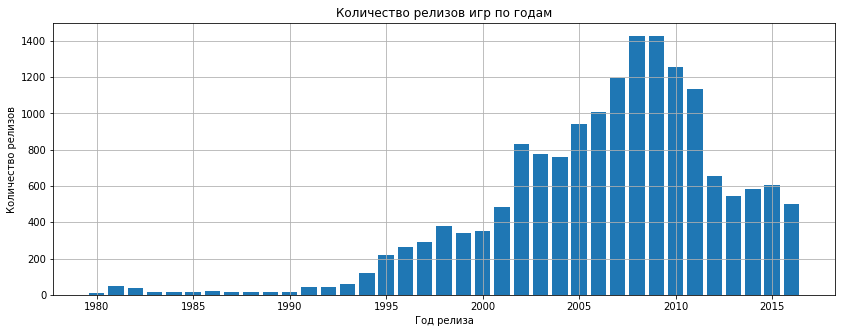

In [27]:
plt.figure(figsize=(14, 5))
plt.bar(game_release['year'], game_release['sum'], label='Количество релизов за год', alpha=1, width=0.8)
plt.xlabel('Год релиза')
plt.ylabel('Количество релизов')
plt.grid()
plt.title(f'Количество релизов игр по годам')
plt.show();

Первые игры появились в 1980-х гг., но лишь с 1993-1995 гг. пошел рост количества релизов, связанный с бумом технического оснащения. Однако с 2010 г. мы наблюдаем спад релизов игр, возможно связанный с ростом популярности более доступных в финансовом и "физическом" смысле мобильных игр и общего финансового фона. 

### Изменения продаж по платформам

Посмотрим суммарные продажи платформ.

In [28]:
platforms_sales = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index().head(10)
platforms_sales

,platform,total_sales
0,ps2,1255.77
1,x360,971.42
2,ps3,939.65
3,wii,907.51
4,ds,806.12
5,ps,730.86
6,gba,317.85
7,ps4,314.14
8,psp,294.05
9,pc,259.52


Поскольку нас интересуют сейчас платформы с наибольшими суммарными продажами, то сохраним топ-5 в отдельной переменной 'best_plf': PS2, X360, PS3, Wii, DS. 

In [29]:
best_plf = platforms_sales.loc[0:4, 'platform']

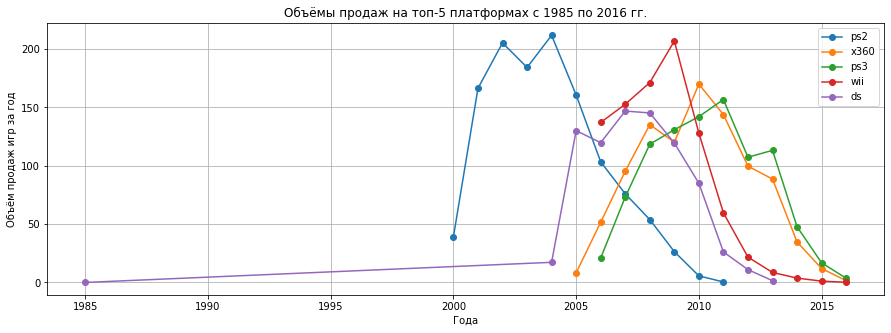

In [30]:
#Построим распределение по годам для платформ с наибольшими суммарными продажами
plt.figure(figsize=(15, 5))

#переменная для подсчета среднего срока жизни платформы
plf_mean_life = 0

for i in range(0,len(best_plf)):
    platform  = games.query('platform == @best_plf[@i]').groupby('year_of_release')['total_sales'].sum()
    plf_mean_life += platform.count()
    platform.plot(x=platform.index, y=platform.values, label = best_plf[i], style='o-', alpha=1, grid=True);
    

plt.xlabel('Года')    
plt.ylabel('Объём продаж игр за год')
plt.title('Объёмы продаж на топ-5 платформах с 1985 по 2016 гг.')
plt.legend()
plt.show();

In [31]:
#посчитаем "средний срок жизни" платформ
plf_mean_life/len(best_plf)

11.4

Характерный срок, за который появляются новые и исчезают старые платформы, составляет 11.4 лет.

### Прогноз на 2017 г.

Возьмем данные за актуальный период. Игровая индустрия динамично изменяется, что видно на рассмотренных графиках, поэтому для целей прогнозирования продаж на 2017 г. мы возьмем последние 3 года, то есть период с 2013 по 2016 гг.

In [32]:
#создадим переменную prediction, в которой будут сохранные данные за 2005-2016 гг.
prediction = games.loc[games['year_of_release']>= 2013]
prediction.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,m,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,m,16.27
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,-1.0,NaN,-1,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,-1.0,NaN,-1,14.60
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,m,12.62
47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014,role-playing,4.35,3.49,3.10,0.74,-1.0,NaN,-1,11.68
60,call of duty: ghosts,x360,2013,shooter,6.73,2.56,0.04,0.91,73.0,2.6,m,10.24
69,call of duty: ghosts,ps3,2013,shooter,4.10,3.63,0.38,1.25,71.0,2.6,m,9.36
72,minecraft,x360,2013,misc,5.70,2.65,0.02,0.81,-1.0,NaN,-1,9.18
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,e,8.58


Посмотрим, какие платформы лидируют по продажам, растут или падают, чтобы выбрать несколько потенциально прибыльных платформ.


In [33]:
plf_sales = prediction.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
plf_sales

,platform,total_sales
0,ps4,314.14
1,ps3,181.43
2,xone,159.32
3,3ds,143.25
4,x360,136.80
5,wiiu,64.63
6,pc,39.43
7,psv,32.99
8,wii,13.66
9,psp,3.50


К платформам с наибольшими суммарными продажами относятся PS4, PS3, XOne, 3DS и X360, если взять первую пятерку платформ. При этом разница в суммарных продажах между 1 и 5 платформой составляет 2.3 раза. К наименьшим — PSP и DS. Сохраним их в отдельной переменной 'best_plf_prediction'.

In [34]:
best_plf_prediction = plf_sales.loc[0:11, 'platform']

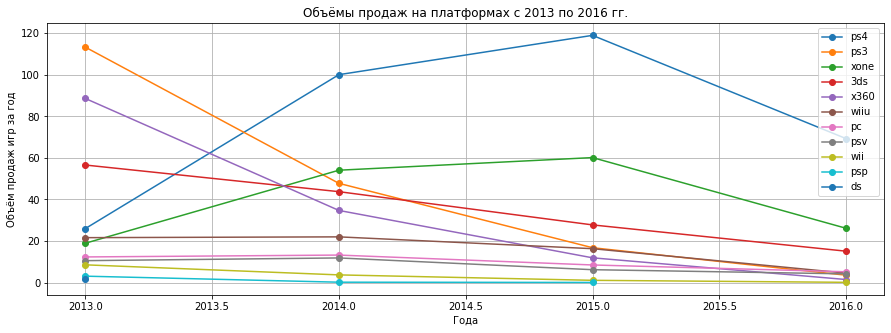

In [35]:
#Построим распределение по годам для всех платформ в рассматриваемом периоде
plt.figure(figsize=(15, 5))

for i in range(0,len(best_plf_prediction)):
    plf = prediction.query('platform == @best_plf_prediction[@i]').groupby('year_of_release')['total_sales'].sum()
    plf.plot(x=platform.index, y=platform.values, label = best_plf_prediction[i], style='o-', alpha=1, grid=True);
    

plt.xlabel('Года')    
plt.ylabel('Объём продаж игр за год')
plt.title('Объёмы продаж на платформах с 2013 по 2016 гг.')
plt.legend()
plt.show();

На основе данного графика мы видим, что платформы с наибольшими суммарными продажами (PS4 и XOne) демонстрировали рост с 2013 по 2015 гг., однако затем наблюдается спад. Платформы Х360, 3DS, PS3 демонстрируют спад в рассматриваемом периоде и, вероятно, что их цикл развития завершается. Вряд ли их можно отнести к потенциально прибыльным платформам. Таковыми можно назвать, согласно графику, лишь две платформы — PS4 и XOne, которые начали свой цикл развития в 2013 г.  
Если следовать предположению о среднем сроке жизни платформ, то еще не достигли своей "гибели" 3DS, WiiU, PSV, которые появились после 2011 г. Вероятно, на них также стоит обратить внимание. В рассматриваемом периоде они не продемонстрировали ни сильный рост, ни сильный спад. 
Спад в 2015-2016 гг. также может быть связан с популярностью более бюджетных аналогов. Отдельно хочется обратить внимение на платформу PC, которая на протяжение всего рассматриваемого периода находится примерно на одном уровне продаж, то есть сохраняет свою актуальность.

### Глобальные продажи игр в разбивке по платформам

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

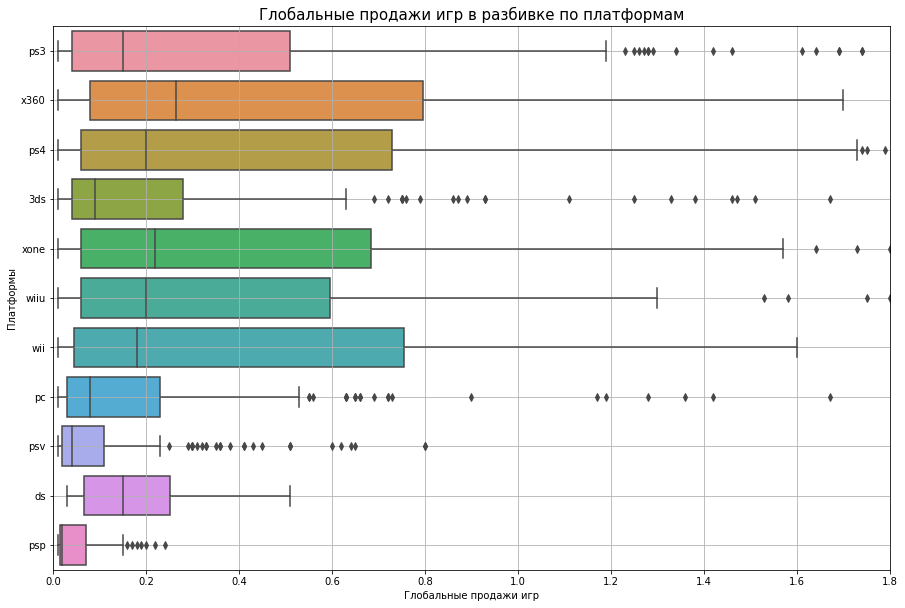

In [36]:
plt.figure(figsize=(15,10))
plt.xlim(0,1.8)
boxplot = sns.boxplot(y='platform', x='total_sales', data=prediction)
boxplot.grid()
boxplot.set_xlabel('Глобальные продажи игр', fontsize=10);
boxplot.set_ylabel('Платформы', fontsize=10);
boxplot.axes.set_title('Глобальные продажи игр в разбивке по платформам', fontsize=15);


Судя по данному графику, медианные значения платформ PS4, XOne, WiiU, Wii находятся на уровне 0.2 млн. Чуть выше уровень демонстрирует платформа X360 — около 0.3 млн. При этом max значение для PS4, X360 превышает 1.6 млн. Большая часть значений лежит в диапазоне до 0.8 млн, а первая квартиль достигает около 0.1 млн. Большая часть значений XOne, и Wii лежит в диапазоне до 0.7 млн, а нижняя граница — около 0.1 млн. Показатели ниже приходятся на платформы PS3, 3DS, PC, PSV, DS и PSP — до 0.1 млн. Max значения для PC и DS не превышает 0.6 млн.
На основе данных наблюдений можно заключить, что платформы PS4, XOne, X360 и Wii определенно заслуживают внимания в 2017 г.

### Влияние на продажи внутри одной популярной платформы отзывы пользователей и критиков

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами для наиболее популярной платфоры — PS4.

In [37]:
ps4_plf = prediction.query('platform == "ps4"')[['total_sales', 'critic_score', 'user_score']].dropna().reset_index(drop=True)
ps4_plf

,total_sales,critic_score,user_score
0,12.62,97.0,8.3
1,8.58,82.0,4.3
2,7.66,83.0,5.7
3,7.60,85.0,5.0
4,7.17,87.0,6.5
...,...,...,...
252,0.01,42.0,2.3
253,0.01,70.0,6.8
254,0.01,69.0,7.5
255,0.01,61.0,7.9


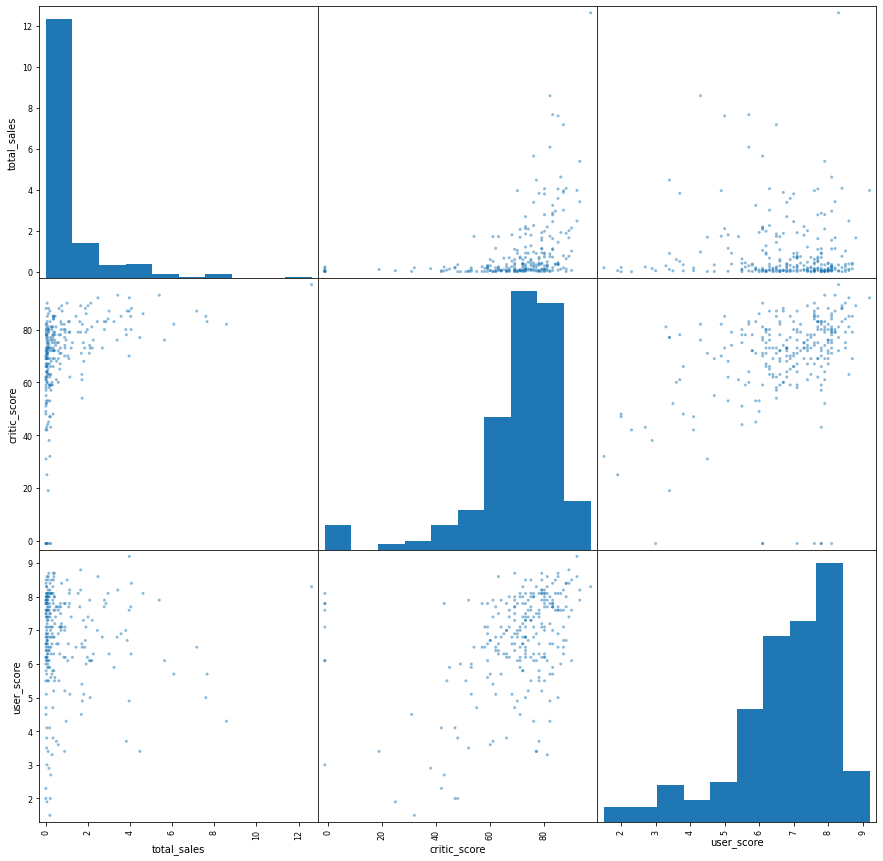

In [38]:
#построим матрицу диаграмм рассеяния для столбцов Х360_plf
pd.plotting.scatter_matrix(ps4_plf, figsize=(15, 15)); 

* В верхней ячейке посередине связь продаж и отзывов критиков. По этой диаграмме рассеяния видно, чем выше оценка, тем больше продаж. Наибольшее число продаж приходится на игры с оценками в районе 70-80 баллов из 100.
* В верхней левой ячейке связь продаж и отзывов игроков. По этой диаграмме рассеяния также видна прямопропорциональная зависимость: чем выше оценка, тем больше продаж. 

In [39]:
#посмотрим коэффициент корреляции Пирсона
ps4_plf.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.350407,-0.031957
critic_score,0.350407,1.000000,0.385579
user_score,-0.031957,0.385579,1.000000


* Корреляция в 0.4 говорит о слабой связи между продажами и отзывами критиков
* Корреляция в -0.03 говорит об отрицательной связи между продажами и отзывами игроков.
* Возможно, что разница в показателях говорит о том, что покупатель охотнее прислушается к мнению критика как эксперта, чем к отзывам других игроков. 
* В первом случае зависимость прямопропорциональная, во втором — обратно пропорциональная.

В целом то, что чем выша оценка, тем выше продажи, кажется логичным, т.к. хорошие продажи гарантированы хорошим играм, однако низкая корреляция между отзывами может говорить о том, что при покупке обращают не столько на отзывы, сколько на другие факторы.

### Соотнесем выводы с продажами игр на других платформах.

Аналогично посмотрим на примере других популярных платформах: XOne, X360 и Wii.

#### XOne

In [40]:
xone_plf = prediction.query('platform == "xone"')[['total_sales', 'critic_score', 'user_score']].dropna().reset_index(drop=True)
xone_plf

,total_sales,critic_score,user_score
0,5.47,97.0,7.9
1,5.26,81.0,5.4
2,4.49,84.0,6.4
3,4.22,88.0,6.2
4,3.50,72.0,4.1
...,...,...,...
177,0.01,-1.0,6.8
178,0.01,65.0,6.0
179,0.01,63.0,8.2
180,0.01,-1.0,6.6


In [41]:
xone_plf.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.333579,-0.068925
critic_score,0.333579,1.000000,0.247230
user_score,-0.068925,0.247230,1.000000


#### X360

In [42]:
x360_plf = prediction.query('platform == "x360"')[['total_sales', 'critic_score', 'user_score']].dropna().reset_index(drop=True)
x360_plf

,total_sales,critic_score,user_score
0,16.27,97.0,8.1
1,10.24,73.0,2.6
2,4.28,-1.0,4.9
3,4.22,84.0,4.2
4,3.49,79.0,5.6
...,...,...,...
138,0.02,-1.0,7.5
139,0.02,-1.0,6.8
140,0.01,-1.0,4.5
141,0.01,-1.0,6.2


In [43]:
x360_plf.corr()  

,total_sales,critic_score,user_score
total_sales,1.000000,0.256209,-0.011742
critic_score,0.256209,1.000000,0.320265
user_score,-0.011742,0.320265,1.000000


#### Wii

In [44]:
wii_plf = prediction.query('platform == "wii"')[['total_sales', 'critic_score', 'user_score']].reset_index(drop=True)
wii_plf

,total_sales,critic_score,user_score
0,3.58,-1.0,6.2
1,2.15,-1.0,6.6
2,2.01,-1.0,8.4
3,1.60,-1.0,4.2
4,0.95,-1.0,NaN
5,0.95,-1.0,NaN
6,0.56,-1.0,4.3
7,0.38,-1.0,4.3
8,0.26,-1.0,2.8
9,0.23,-1.0,NaN


In [45]:
wii_plf.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,NaN,0.682942
critic_score,NaN,NaN,NaN
user_score,0.682942,NaN,1.000000


На примере других платформ подтверждается незначительная связь между продажами и оценками критиков и пользователей.

### Общее распределение игр по жанрам

Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [46]:
genres = prediction.groupby('genre')['name'].count().sort_values(ascending=False)
genres

genre
action          766
role-playing    292
adventure       245
sports          214
shooter         187
misc            155
racing           85
fighting         80
platform         74
simulation       62
strategy         56
puzzle           17
Name: name, dtype: int64

С 2013 г. больше всего было выпущено игр в жанре экшн, на втором месте — ролевые игры, а на третьем — приключения. В топ-5 также входят спорт и шутеры.

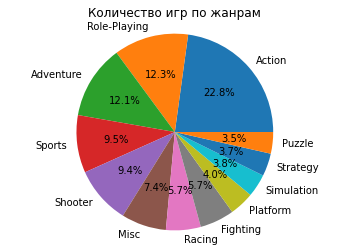

In [47]:
#построим круговую диаграмму для наглядности
vals = [2574, 1383, 1368, 1067, 1065, 833, 644, 638, 456, 423, 422, 399]

labels = ["Action", "Role-Playing", "Adventure", "Sports", "Shooter", "Misc", "Racing", "Fighting", "Platform", "Simulation", "Strategy", "Puzzle"]

fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%')
ax.set_title('Количество игр по жанрам')
ax.axis("equal");

In [48]:
genre_sales = prediction.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
genre_sales

genre
action          321.87
shooter         232.98
sports          150.65
role-playing    145.89
misc             62.82
platform         42.63
racing           39.89
fighting         35.31
adventure        23.64
simulation       21.76
strategy         10.08
puzzle            3.17
Name: total_sales, dtype: float64

Если посмотреть на топ наиболее прибыльных жанров, то ситуация немного отличается. Ожидаемо лидером продаж являются экшн-игры, за ними следуют шутеры, а затем спорт, ролевые игры и аркады.

В целом можно сделать вывод, что наиболее продаваемыми и выпускаемыми жанрами являются экшн и шутеры. Стратегии и паззлы же демонстрируют низкие продажи и выпускаются значительно реже. Обратим внимание, что мы рассматривали данные за актуальный период (2013-2016 гг.) для того, чтобы сделать прогноз на 2017 г.

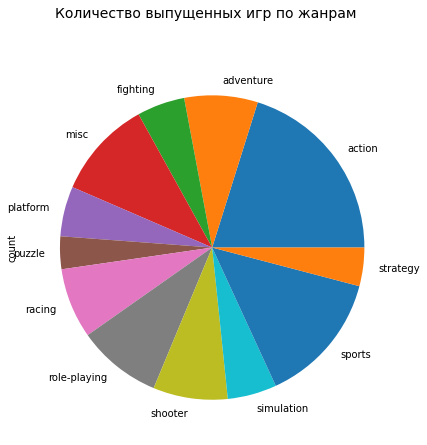

In [50]:

games_by_genre = games.pivot_table(index='genre', values='name', aggfunc='count')  # создаем таблицу
games_by_genre.columns = ['count']
games_by_genre.plot(y='count', kind='pie', legend=False, figsize=(7, 7)) # визуализируем полученные данные
plt.suptitle('Количество выпущенных игр по жанрам', size=14)
plt.show()

Здесь лидером является уже не экшен, который вообще скатился до 6 места, но жанр шутеров...  

In [51]:
genre_sales = prediction.groupby('genre')['total_sales'].median().sort_values(ascending=False)
genre_sales

genre
shooter         0.450
sports          0.240
platform        0.225
role-playing    0.125
fighting        0.125
racing          0.120
action          0.110
simulation      0.100
misc            0.100
strategy        0.080
puzzle          0.060
adventure       0.030
Name: total_sales, dtype: float64

### Вывод

* Итак, первые игры стали появляться в 80-х гг. В 1995-2010 гг. наблюдался рост релизов, сменившийся падением в связи с ростом популярности мобильных платформ. Характерный срок, за который появляются новые и исчезают старые платформы, составляет 11.4 лет, поэтому в качестве актуального периода для пострения прогноза на 2017 г. мы взяли 2005-2016 гг.

* PS4, PS3, XOne, 3DS и X360 — платформы с наибольшими, а PSP и DS — с наименьшими суммарными продажами в период с 2013 г. по 2016 г. PS4 и XOne можно назвать потенциально прибыльными платформами.  Платформы X360 и Wii также заслуживают внимания в 2017 г.Продажи на популярных платформах схожи.

* Зависимость продаж внутри платформы PS4 и отзывов критиков/пользователей прямопропорциональная, однако согласно корреляции Пирсона невелика. 

* С 2013 г. больше всего было выпущено игр в жанре экшн, на втором месте — ролевые игры, а на третьем — приключения. В топ-5 также входят шутеры и спорт. Если посмотреть на жанры с точки зрения прибыльности, то лидером продаж являются шутеры, т.к. медианное значений их глобальных продаж превышает аналогичный показатель у экшен-игр. Стратегии и паззлы же демонстрируют низкие продажи и выпускаются значительно реже.

## Региональный портрет пользователя

Определим для пользователя каждого региона (NA, EU, JP): 
* самые популярные платформы (топ-5);
* самые популярные жанры (топ-5);
* влияние рейтинга ESRB на продажи в отдельных регионах.

### Топ-5 популярных игровых платформ

#### Северная Америка

In [52]:
na_plf= prediction.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5)

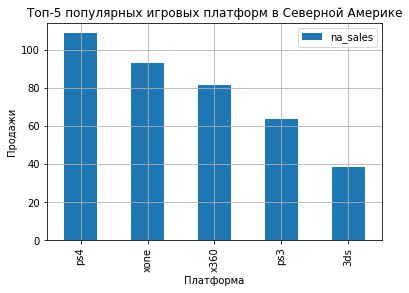

In [53]:
na_plf.plot(kind='bar', grid=True);
plt.title("Топ-5 популярных игровых платформ в Северной Америке");
plt.xlabel("Платформа");
plt.ylabel("Продажи");

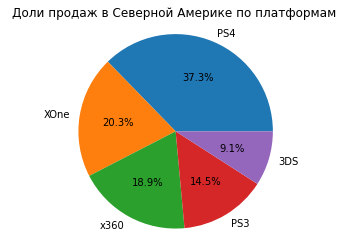

In [54]:
#построим круговую диаграмму для наглядности
labels = ['PS4', 'XOne', 'x360', 'PS3', '3DS']

vals = [160, 87, 81, 62, 39 ]

fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%')
ax.set_title('Доли продаж в Северной Америке по платформам')
ax.axis("equal");

#### Европа 

In [55]:
eu_plf= prediction.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5)

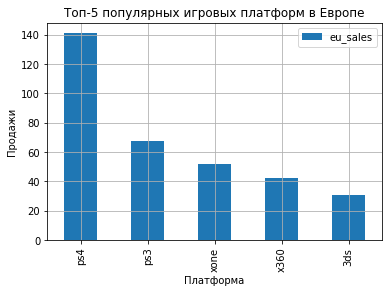

In [56]:
eu_plf.plot(kind='bar', grid=True);
plt.title("Топ-5 популярных игровых платформ в Европе");
plt.xlabel("Платформа");
plt.ylabel("Продажи");

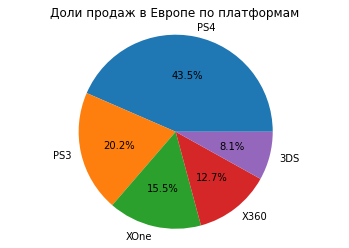

In [57]:
#построим круговую диаграмму для наглядности
labels = ['PS4', 'PS3','XOne', 'X360', '3DS']

vals = [140, 65, 50, 41, 26 ]

fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%')
ax.set_title('Доли продаж в Европе по платформам')
ax.axis("equal");

#### Япония

In [58]:
jp_plf= prediction.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5)

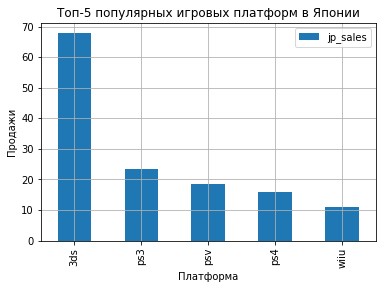

In [59]:
jp_plf.plot(kind='bar',grid=True);
plt.title("Топ-5 популярных игровых платформ в Японии");
plt.xlabel("Платформа");
plt.ylabel("Продажи");

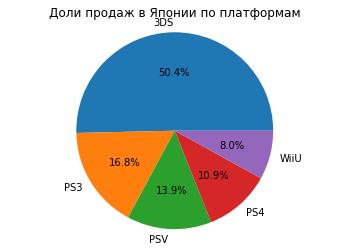

In [60]:
#построим круговую диаграмму для наглядности
labels = ['3DS', 'PS3', 'PSV', 'PS4', 'WiiU']

vals = [69, 23, 19, 15, 11 ]

fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%')
ax.set_title('Доли продаж в Японии по платформам')
ax.axis("equal");

Согласно полученным гистограммам, во всех трех регионах разные лидеры среди платформ, в Северной Америке — PS4, в Европе — PS4, в Японии — 3DS. Игроки в этих регионах в целом предпочитают одни и те же платформы: X360, PS3, DS, но они популярны в разной степени.

### Топ-5 популярных жанров

#### Северная Америка

In [62]:
na_genres_median = prediction.groupby(by='genre').agg({'na_sales':'median'}).sort_values(by='na_sales', ascending=False).head(5)
na_genres_median

,na_sales
genre,
shooter,0.200
platform,0.090
sports,0.080
fighting,0.045
racing,0.030


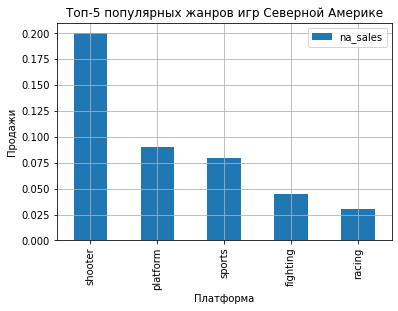

In [63]:
na_genres_median.plot(kind='bar', grid=True);
plt.title("Топ-5 популярных жанров игр Северной Америке");
plt.xlabel("Платформа");
plt.ylabel("Продажи");

#### Европа 

In [65]:
eu_genres = prediction.groupby(by='genre').agg({'eu_sales':'median'}).sort_values(by='eu_sales', ascending=False).head(5)

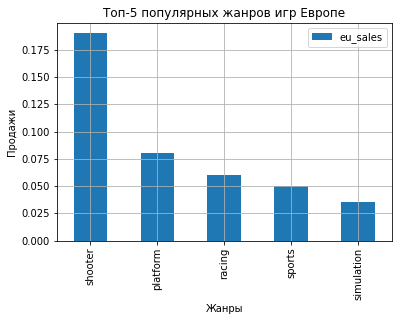

In [66]:
eu_genres.plot(kind='bar', grid=True);
plt.title("Топ-5 популярных жанров игр Европе");
plt.xlabel("Жанры");
plt.ylabel("Продажи");

#### Япония

In [68]:
jp_genres = prediction.groupby(by='genre').agg({'jp_sales':'median'}).sort_values(by='jp_sales', ascending=False).head(5)

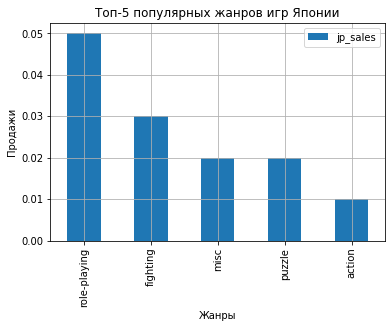

In [69]:
jp_genres.plot(kind='bar', grid=True);
plt.title("Топ-5 популярных жанров игр Японии");
plt.xlabel("Жанры");
plt.ylabel("Продажи");

В Северной Америке и Европе лидером среди игровых жанров стали шутеры, на втором месте оказались платформы. Причем для обоих регионов характерен значительный отрыв между 1 и 2 местом. В Японии же лидирует жанр Role-Playing. Что характерно, в обоих выборках топ-5 жанров отсутствуют экшен-игры.

### Влияние рейтинга ESRB на продажи в отдельном регионе

Рейтинг ESRB определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. 
* «EC» («Early childhood») — «Для детей младшего возраста»
* «E» («Everyone») — «Для всех»
* «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
* «T» («Teen») — «Подросткам»
* «M» («Mature») — «Для взрослых»
* «AO» («Adults Only 18+») — «Только для взрослых»
* «RP» («Rating Pending») — «Рейтинг ожидается»
* «RP 17+» («Rating Pending») — «Рейтинг ожидается - примерно 17+»

Нужно отметить, что данный рейтинг был разработан для определения рейтингов для компьютерных видеоигр в США и Канаде, для Европы — это рейтинг PEGI, для Японии — CERO. Поэтому вероятно, что при работе с японским рынком нет смысла обращать внимание на американский рейтинг.

#### Северная Америка

In [70]:
esrb_na = prediction.pivot_table(index='rating', values='na_sales').sort_values(by = 'na_sales', ascending=False)
esrb_na

,na_sales
rating,
m,0.447724
e,0.261755
e10+,0.215238
t,0.149520
-1,0.091525


К наиболее часто присваемым возростным категориям в Северной Америке относятся категории «Только для взрослых», «Для взрослых» и «Для всех». 

#### Европа

In [71]:
esrb_eu = prediction.pivot_table(index='rating', values='eu_sales').sort_values(by = 'eu_sales', ascending=False)
esrb_eu

,eu_sales
rating,
m,0.393821
e,0.276026
e10+,0.169405
t,0.125976
-1,0.080768


Аналогичная ситуация наблюдается и в Европе.

#### Япония

In [72]:
esrb_jp = prediction.pivot_table(index='rating', values='jp_sales').sort_values(by = 'jp_sales', ascending=False)
esrb_jp

,jp_sales
rating,
-1,0.087052
t,0.061832
e,0.050132
m,0.038238
e10+,0.023373


В Японии же ситуация немного иная и в первую тройку лидеров вошли следующие категории: «Для всех», «Подросткам» и для «Для взрослых». 

В Северной Америке и Европе похожии ситуации, там в первую очередь популярны игры с возрастным рейтингом 18+, т.е. эти рынки ориентированы на взрослых пользователей.
В Японии лидируют игры с возрастным рейтингом 13+, т.е. компании хотят распространить свое влияние на новое поколение. Однако нужно быть аккуратным с японским рынком, т.к. скорее всего авторы игр не интересуются рейтингом ESRB, рассчитанным на аудиторию другого региона.

### Вывод

Теперь мы можем составить региональный портрет игрока: 
* Северная Америка: игрок 18+ лет, предпочитающие играть в шутеры на PS4;
* Европа: игрок 18+ лет, предпочитающие играть в шутеры на PS4;
* Япония: игрок 13+, предпочитающий играть в ролевые игры на 3DS. 

В дальнейшем следует обращаться к рейтингам игр, соответствующим рассматриваемым региональным рынкам.

## Проверка гипотез

Сформулируем нулевую и альтернативную гипотезы для следующих утверждений:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Гипотеза № 1 

Возьмем утверждение "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" в качестве нулевой гипотезы и сформулируем альтернативную:

* H_0: средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* H_а: средний пользовательские рейтинги платформ Xbox One и PC различаются

Обратимся к специальному методу для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: 'scipy.stats.ttest_ind'.
Поскольку данные выборки независимы между собой, мы будем использовать t-критерий Стьюдента.

In [73]:
#посмотрим на средние оценки пользователей платформ Xbox One и PC
hypothesise_1 = prediction.query('platform == "xone" or platform == "pc"')
hypothesise_1.pivot_table(index='platform', values='user_score', aggfunc='mean')

,user_score
platform,
pc,6.269677
xone,6.521429


Средние пользовательские рейтинги платформ Xbox One и PC в целом одинаковые.

In [74]:
#посмотрим стандартное отклонение для средних оценок пользователей платформ Xbox One 
std_xone = prediction.query('platform == "xone"')
std_xone = np.std(std_xone)  
std_xone

year_of_release     0.951064
na_sales            0.629341
eu_sales            0.364566
jp_sales            0.005142
other_sales         0.094030
critic_score       36.162630
user_score          1.377142
total_sales         1.034039
dtype: float64

In [75]:
#посмотрим стандартное отклонение для средних оценок пользователей платформ PC
std_pc = prediction.query('platform == "pc"')
std_pc = np.std(std_pc)  
std_pc

year_of_release     1.097880
na_sales            0.127467
eu_sales            0.211460
jp_sales            0.000000
other_sales         0.030118
critic_score       32.622172
user_score          1.736752
total_sales         0.351371
dtype: float64

Стандартное отклонение для средних оценок пользователей платформ Xbox One равно 1.377, для PC — 1.736.

In [76]:
#посмотрим на дисперсии, чтобы определиться с параметром equal_var
xone = prediction[prediction['platform'] == 'xone']['user_score']
print('Дисперсия Xbox One =', np.var(xone))

Дисперсия Xbox One = 1.8965188383045526


In [77]:
pc = prediction[prediction['platform'] == 'pc']['user_score']
print('Дисперсия PC =', np.var(pc))

Дисперсия PC = 3.01630634755463


Т.к. значения дисперсий отличаются, то возьмем equal_var=False.

Проверим рассчитанное стандартное отклонение путем извлечения корня из дисперсии. Он должен быть равен стандартному отклонению.

In [78]:
#для Xbox One 
variance = 1.896
standard_deviation = np.sqrt(variance)
print(standard_deviation) 

1.3769531582446803


In [79]:
#для PC 
variance2 = 3.016
standard_deviation2 = np.sqrt(variance2)
print(standard_deviation2) 

1.7366634676873929


Теперь перейдем к проверке гипотез.

In [80]:
alpha = 0.05

results = st.ttest_ind(xone, pc, equal_var=False, nan_policy = 'omit')


print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1475959401343032
Не получилось отвергнуть нулевую гипотезу


Мы подтвердили гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 

### Гипотеза № 2

Возьмем утверждение "Средние пользовательские рейтинги жанров Action и Sports разные" в качестве нулевой гипотезы и сформулируем альтернативную:

* H_0: средние пользовательские рейтинги жанров Action и Sports одинаковые
* H_a: средние пользовательские рейтинги жанров Action и Sports разные

In [81]:
#посмотрим на средние оценки пользователей жанров Action и Sports 
hypothesise_1 = prediction.query('genre == "action" or genre == "sports"')
hypothesise_1.pivot_table(index='genre', values='user_score', aggfunc='mean')

,user_score
genre,
action,6.837532
sports,5.238125


Средние пользовательские рейтинги жанров Action и Sports отличаются. 

In [82]:
#посмотрим стандартное отклонение для средних оценок пользователей платформ Action
std_action = prediction.query('genre == "action"')
std_action = np.std(std_action)  
std_action

year_of_release     1.043038
na_sales            0.542447
eu_sales            0.516112
jp_sales            0.168088
other_sales         0.191191
critic_score       36.418171
user_score          1.328462
total_sales         1.253091
dtype: float64

In [83]:
#посмотрим на дисперсии, чтобы определиться с параметром equal_var
action = prediction[(prediction['genre'] == 'action') & (prediction['user_score'] > 0)]['user_score']
print('Дисперсия жанра "экшен" =', np.var(action))

Дисперсия жанра "экшен" = 1.7648124186332366


In [84]:
#для Action 
variance = 1.764
standard_deviation3 = np.sqrt(variance)
print(standard_deviation3) 

1.3281566172707193


In [85]:
#посмотрим стандартное отклонение для средних оценок пользователей платформ Action
std_sports = prediction.query('genre == "sports"')
std_sports = np.std(std_sports)  
std_sports

year_of_release     1.092419
na_sales            0.488833
eu_sales            0.797976
jp_sales            0.053987
other_sales         0.188011
critic_score       38.149842
user_score          1.777845
total_sales         1.216385
dtype: float64

In [86]:
sports = prediction[(prediction['genre'] == 'sports') & (prediction['user_score'] > 0)]['user_score']
print('Дисперсия жанра "спорт" =', np.var(sports))

Дисперсия жанра "спорт" = 3.160733984375


In [87]:
#для Sports  
variance = 3.16
standard_deviation4 = np.sqrt(variance)
print(standard_deviation4) 

1.7776388834631178


Корень из дисперсии равен стандартному отклонению. Т.к. значения дисперсий отличаются, то возьмем equal_var=False.

In [88]:
alpha = 0.05

results = st.ttest_ind(action, sports, equal_var=True, nan_policy = 'omit')

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


Согласно результатам проверки гипотезы №2, средние пользовательские рейтинги жанров Action и Sports разные, как и предполагалось изначально.

## Вывод

Итак, в ходе данного исследования мы выполнили несколько шагов. 

После знакомства с данными мы сделали их предобработку, включающую в себя приведение названия и содержимого столбцов к нижнему регистру, поработали с пропусками и значением 'tbd' в столбце с оценкой пользователей. Мы использовали "заглушки" для пропусков в столбцах 'critic_score', 'user_score', 'rating', поскольку, с одной стороны, нельзя удалять такое значительное количество пропусков, с другой стороны, не хочется искажать данные. Были посчитаны суммарные продажи во всех регионах и записаны в отдельный столбец.

Затем был проведен исследовательский анализ данных, в ходе которого мы обращались к различным видам визуализации (гистограммы, матрица диаграммы рассеяния, ящик с усами, круговая диаграмма). Нами были сделаны следующие выводы. 

Первые игры стали появляться в 80-х гг. В 1995-2010 гг. наблюдался рост релизов, сменившийся падением в связи с ростом популярности мобильных платформ. Характерный срок, за который появляются новые и исчезают старые платформы составляет **11.4 лет**. Однако рассматриваемая нами сфера динамична, поэтому в качестве актуального периода для пострения прогноза на 2017 г. мы взяли **2013-2016 гг.** 

Было выявлено, что в 2013-2016 гг. **PS4, PS3, XOne, 3DS и X360** — платформы с наибольшими суммарными продажами. **PS4 и XOne** можно назвать потенциально прибыльными платформами.  Платформы **X360 и Wii** также заслуживают внимания в 2017 г., т.к. цикл их развития только начался. **PSP и DS** — с наименьшими суммарными продажами. Продажи на популярных платформах схожи. 

Мы определили, что **зависимость продаж внутри платформы PS4 и отзывов критиков/пользователей** прямопропорциональная, согласно матрице диаграм рассеяния, однако согласно корреляции Пирсона зависимость от отзывов критиков незначительна и прямопропорциональная, а от отзывов игроков — обратно пропорциональная. Возможно, что разница в показателях говорит о том, что покупатель охотнее прислушается к мнению критика как эксперта, чем к отзывам других игроков. В целом то, что чем выша оценка, тем выше продажи, кажется логичным, т.к. хорошие продажи гарантированы хорошим играм, однако низкая корреляция между отзывами может говорить о том, что при покупке обращают не столько на отзывы, сколько на другие факторы. Это характерно и для ряда других популярных платформ (XOne, X360, Wii).

С 2013 г. больше всего было выпущено игр в жанре экшн, на втором месте — ролевые игры, а на третьем — приключения. В топ-5 также входят шутеры и спорт. Если посмотреть на жанры с точки зрения прибыльности, то лидером продаж являются шутеры, т.к. медианное значений их глобальных продаж превышает аналогичный показатель у экшен-игр. Стратегии и паззлы же демонстрируют низкие продажи и выпускаются значительно реже.

Мы составили портреты пользователя Северной Америки, Европы и Японии. Они похожи для СА и Европы: это игрок 18+ лет, предпочитающие играть в шутеры на PS4. В Японии — это игрок 13+, предпочитающий играть в ролевые игры на 3DS. Однако в дальнейшем следует обращаться к рейтингам игр, соответствующим рассматриваемым региональным рынкам. Однако следует обратить внимание, что есть данные только по рейтингу игр для региона СА и, возможно, Европы, т.к. рынки похожи. Вероятно, что рейтинг для Японии не применим. 

В конце мы проверили гипотезы с помощью статистических методов. Мы подтвердили гипотезу №1 о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Согласно результатам проверки гипотезы №2, средние пользовательские рейтинги жанров Action и Sports разные, как и предполагалось изначально.

Итак, потенциально успешный продукт должен обладать рядом характеристик:

* Игра должна быть разработана для платформ PS4, если речь идет о западном рынке, и — для платформы 3DS, если игру планируется продавать в Японии.
* Жанр: Shooter для Запада, Role-Playing — для Японии.
* Рейтинг ESRB: либо от 18 лет для Запада. Для Японии лучш обратиться к локальному рейтингу CERO. 
* Ориентироваться на оценки критиков или пользователей не стоит, т.к. на продажи это не оказывает существенного влияния.